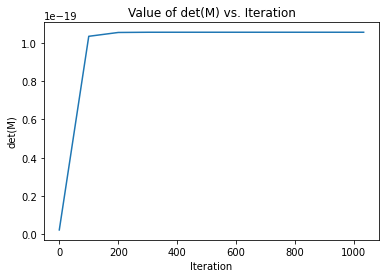

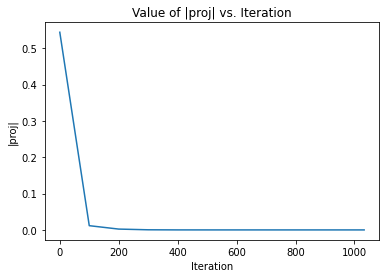

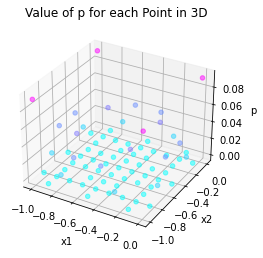

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x1, x2):
    return np.array([1, x1, x2, x1 * x2, x1 ** 2, x2 ** 2, x1 ** 3, x2 ** 3, x1 ** 2 * x2, x1 * x2 ** 2])

def compute_coefficient_gradient(n, x, p):
    proj = np.zeros(n)
    grad = np.zeros(n)

    df = pd.DataFrame(columns=['iteration', 'detM', '|proj|'])

    solution_found = False
    iter_count = 0
    
    while not solution_found:
        lambdas = 0.1
        solution_found = True
        q = n - np.count_nonzero(p)

        M = np.zeros((10, 10))
        for i in range(n):
            M += p[i] * (f(x[i][0], x[i][1])[:, np.newaxis] @ f(x[i][0], x[i][1])[np.newaxis, :])
        M_inv = np.linalg.inv(M)

        for i in range(n):
            grad[i] = np.trace(M_inv @ f(x[i][0], x[i][1])[:, np.newaxis] @ f(x[i][0], x[i][1])[np.newaxis, :])
        grad /= np.linalg.norm(grad)

        avg = 0.0
        for i in range(n):
            if p[i] != 0.0:
                avg += grad[i]
        avg /= n - q

        for i in range(n):
            if p[i] != 0 and abs(grad[i] - avg) > 1e-10:
                solution_found = False

        for j in range(n):
            proj[j] = grad[j] - avg
            if p[j] == 0:
                if proj[j] > 0:
                    solution_found = False
                else:
                    proj[j] = 0

        if iter_count % 100 == 0:
            df = df.append({'iteration': iter_count, 'detM': np.linalg.det(M), '|proj|': np.linalg.norm(proj)}, ignore_index=True)

        if not solution_found:
            for i in range(n):
                if proj[i] < 0 and lambdas > -p[i] / proj[i]:
                    lambdas = -p[i] / proj[i]

            for i in range(n):
                p[i] += lambdas * proj[i]

        iter_count += 1

    df = df.append({'iteration': iter_count, 'detM': np.linalg.det(M), '|proj|': np.linalg.norm(proj)}, ignore_index=True)

    return p, M_inv, df

def find_optimal_coefficient(M_inv):
    max_val = 0
    n = 401
    for i in range(n):
        for j in range(n):
            tr = np.trace(f(-1 + 0.005 * i, -1 + 0.005 * j)[:, np.newaxis] @ f(-1 + 0.005 * i, -1 + 0.005 * j)[np.newaxis, :] @ M_inv)
            if tr > max_val:
                max_val = tr
                x1m = -1 + 1e-2 * i
                x2m = -1 + 1e-2 * j
    return max_val, x1m, x2m

m = 9
n = m*m
p = np.ones(n)
p = p * (1.0/n)
x = np.zeros((n, 2))

for i in range(0, m):
    for j in range(0, m):
        x[i*m + j][0] = -1 + 0.125*i
        x[i*m + j][1] = -1 + 0.125*j

p, M_1, df1 = compute_coefficient_gradient(n, x, p)
max, x1m, x2m = find_optimal_coefficient(M_1)
df2 = pd.DataFrame({'x1': x[:, 0], 'x2': x[:, 1], 'p': p})

plt.plot(df1['iteration'], df1['detM'])
plt.xlabel('Iteration')
plt.ylabel('det(M)')
plt.title('Value of det(M) vs. Iteration')
plt.show()

plt.plot(df1['iteration'], df1['|proj|'])
plt.xlabel('Iteration')
plt.ylabel('|proj|')
plt.title('Value of |proj| vs. Iteration')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], p, c=p, cmap='cool', alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('p')
ax.set_title('Value of p for each Point in 3D')
plt.show()

In [ ]:
df1

,iteration,detM,|proj|
0,0.0,2.272983e-21,5.437922e-01
1,100.0,1.034870e-19,1.166348e-02
2,200.0,1.054881e-19,2.284677e-03
3,300.0,1.056052e-19,3.506212e-04
4,400.0,1.056079e-19,5.337986e-05
5,500.0,1.056080e-19,8.116834e-06
6,600.0,1.056080e-19,1.234001e-06
7,700.0,1.056080e-19,1.875995e-07
8,800.0,1.056080e-19,2.851978e-08
9,900.0,1.056080e-19,4.335702e-09


In [ ]:
df2

,x1,x2,p
0,-1.0,-1.000,0.092184
1,-1.0,-0.875,0.000000
2,-1.0,-0.750,0.015370
3,-1.0,-0.625,0.039881
4,-1.0,-0.500,0.000000
...,...,...,...
76,0.0,-0.500,0.000000
77,0.0,-0.375,0.039881
78,0.0,-0.250,0.015370
79,0.0,-0.125,0.000000
